In [1]:
import pandas as pd
import numpy as np
from pathlib import Path


In [2]:
valid_after = 1000
valid_iters = 1000

In [3]:
current_path = str(Path.cwd()).split("/")
dataset = current_path[-4]
domain_type = "-".join(current_path[-5].split("_")[:-1])
model = current_path[-2].split("_")[0]
info_str = f"Model: {model}, Domain-Type: {domain_type}, Dataset: {dataset}"


In [4]:
training_loss_acc = pd.read_csv("experiment_results_train.csv")
valid_loss_acc = pd.read_csv("experiment_results_validation.csv")[:-valid_iters]

In [5]:
training_loss_acc["running_loss_training"] = training_loss_acc["Loss"].rolling(100).mean()
training_loss_acc["running_acc_training"] = training_loss_acc["Accuracy"].rolling(100).mean()
training_loss_acc["iteration"] = training_loss_acc.index
training_loss_acc = training_loss_acc.rename(columns={"Accuracy": "raw_acc_training",
                                "Loss": "raw_loss_training"})#.drop(["Accuracy", "Loss"], axis=1)

training_loss_acc["epoch"] = np.ceil((training_loss_acc.index+0.000001) / valid_after).astype(int)
training_loss_acc

,raw_acc_training,raw_loss_training,running_loss_training,running_acc_training,iteration,epoch
0,0.0000,2.977582,NaN,NaN,0,1
1,0.0625,3.559439,NaN,NaN,1,1
2,0.0000,3.551001,NaN,NaN,2,1
3,0.1250,3.608765,NaN,NaN,3,1
4,0.3125,2.977797,NaN,NaN,4,1
...,...,...,...,...,...,...
9995,1.0000,0.002344,0.002823,0.99875,9995,10
9996,1.0000,0.000820,0.002669,0.99875,9996,10
9997,1.0000,0.000286,0.002668,0.99875,9997,10
9998,1.0000,0.000353,0.002668,0.99875,9998,10


In [6]:
valid_loss_acc["epoch"]  = np.ceil((valid_loss_acc.index+0.000001) / valid_iters).astype(int)

valid_per_epoch = valid_loss_acc.groupby("epoch", as_index=False).mean().rename(columns={"Accuracy": "running_acc_validation",
                                "Loss": "running_loss_validation"})

epochs_df = training_loss_acc.merge(valid_per_epoch, on="epoch").set_index("iteration")[1:]

valid_per_epoch


,epoch,running_acc_validation,running_loss_validation
0,1,0.417700,1.387709
1,2,0.516163,1.252448
2,3,0.532588,1.201746
3,4,0.530225,1.209743
4,5,0.540588,1.175735
5,6,0.545863,1.166039
6,7,0.529400,1.196227
7,8,0.496613,1.270842
8,9,0.521263,1.224788
9,10,0.521850,1.211420


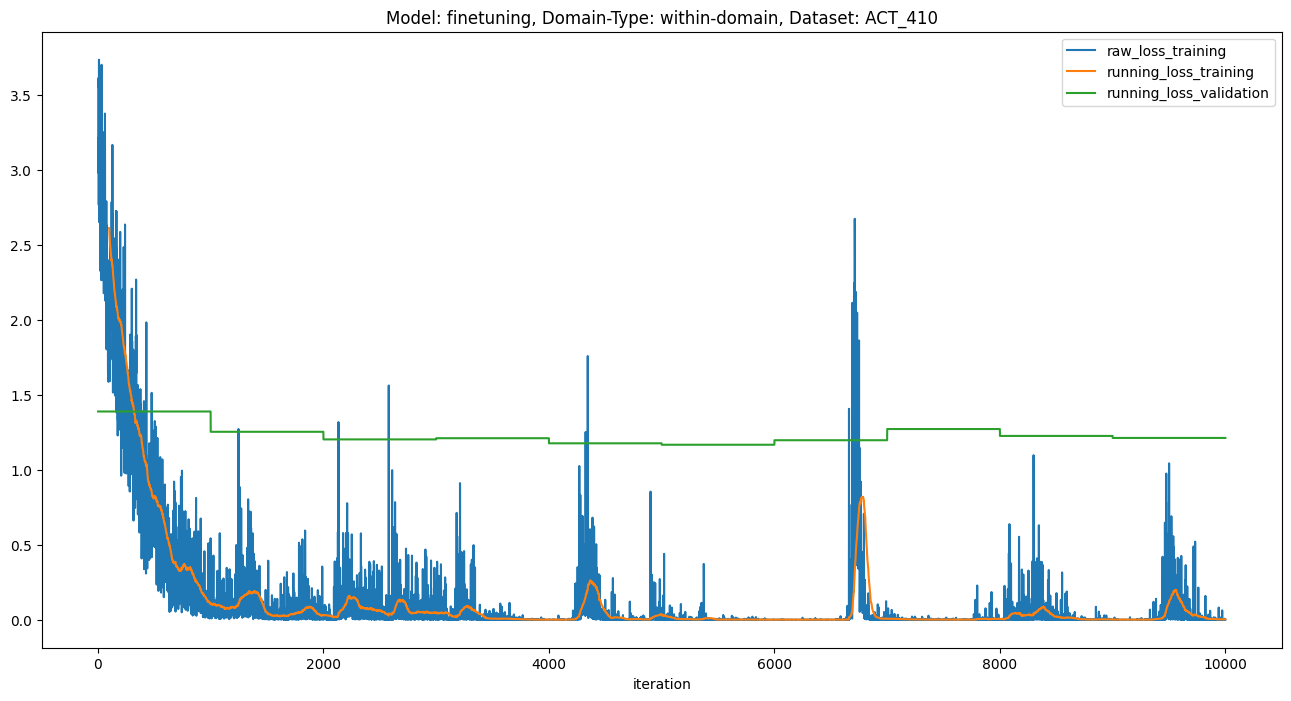

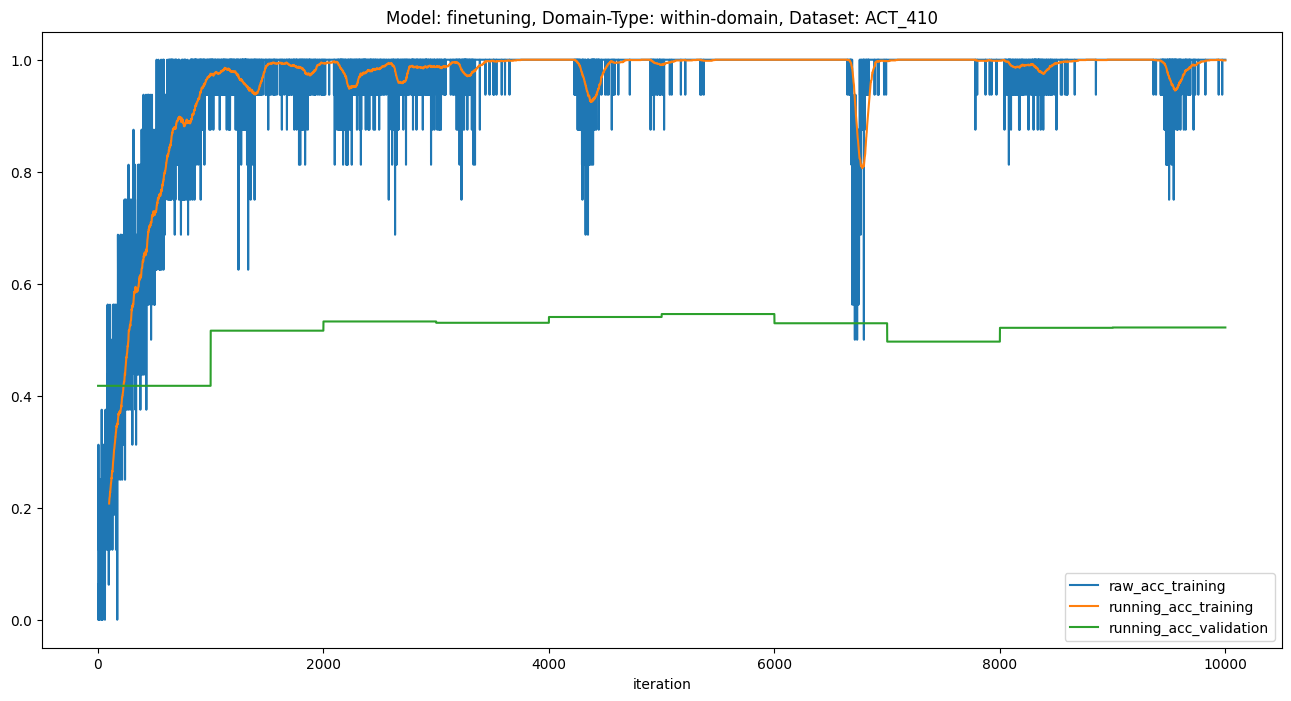

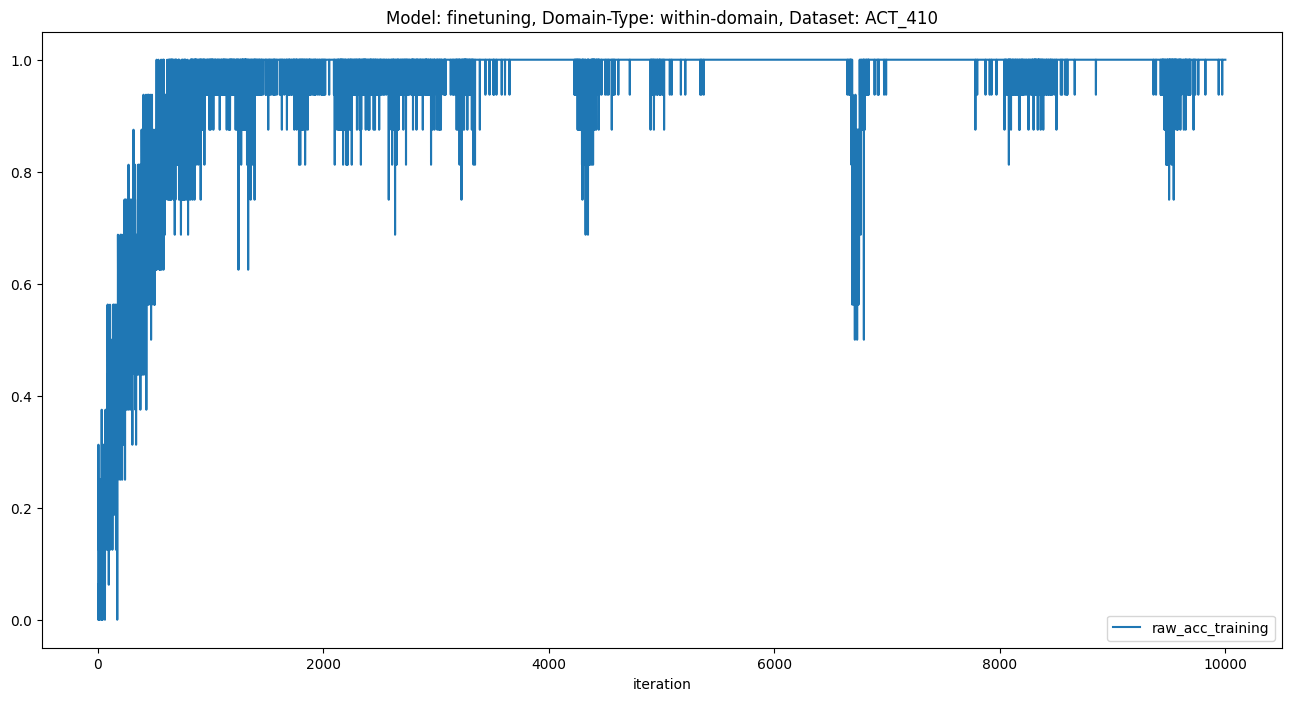

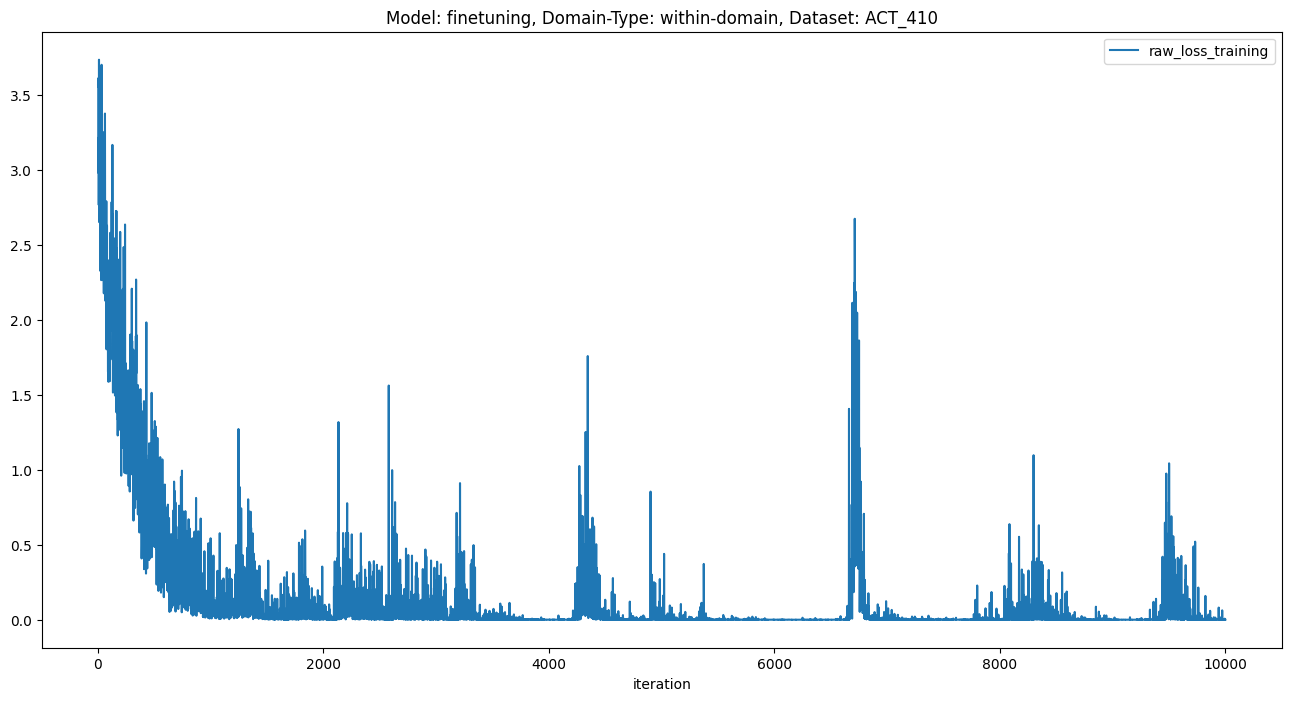

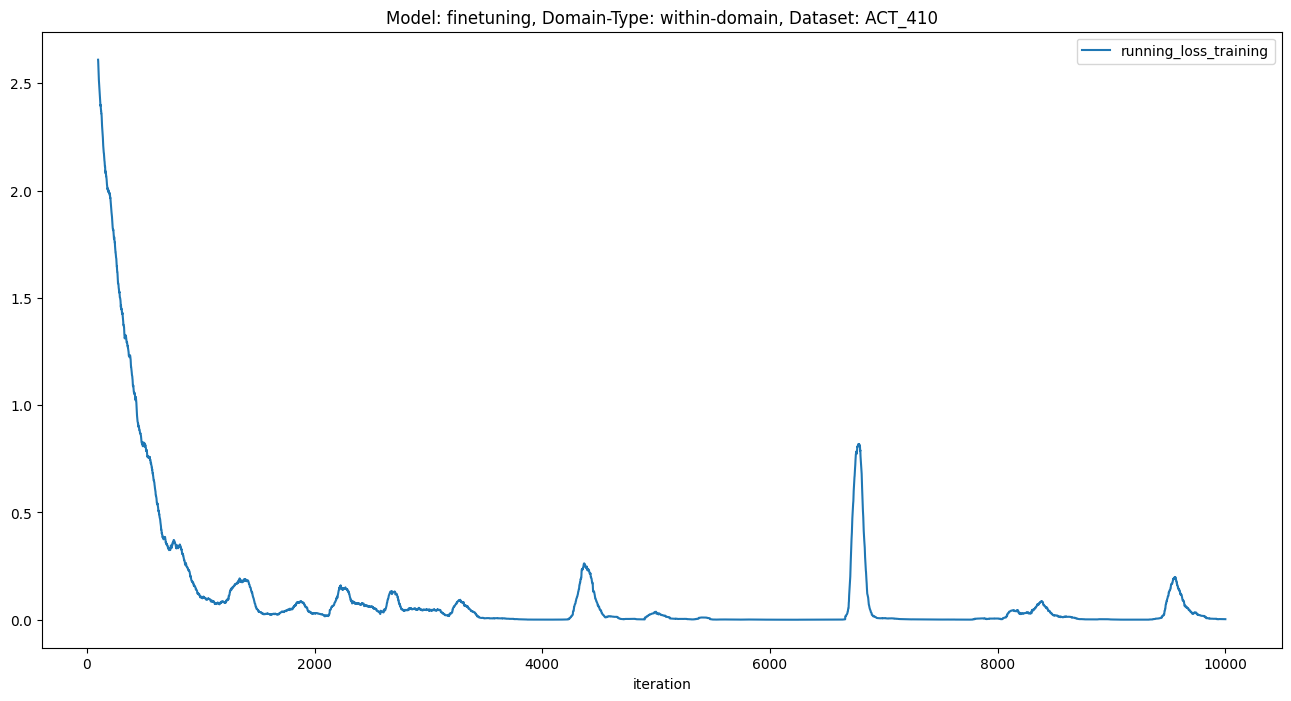

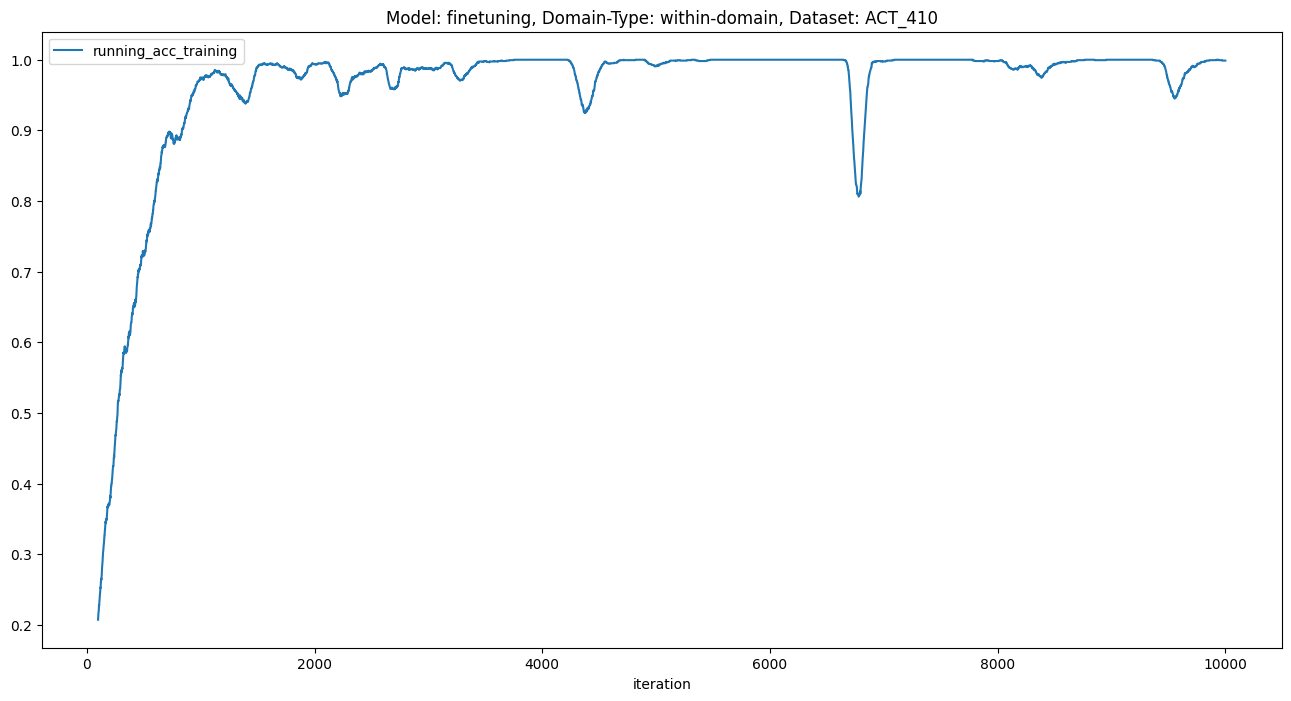

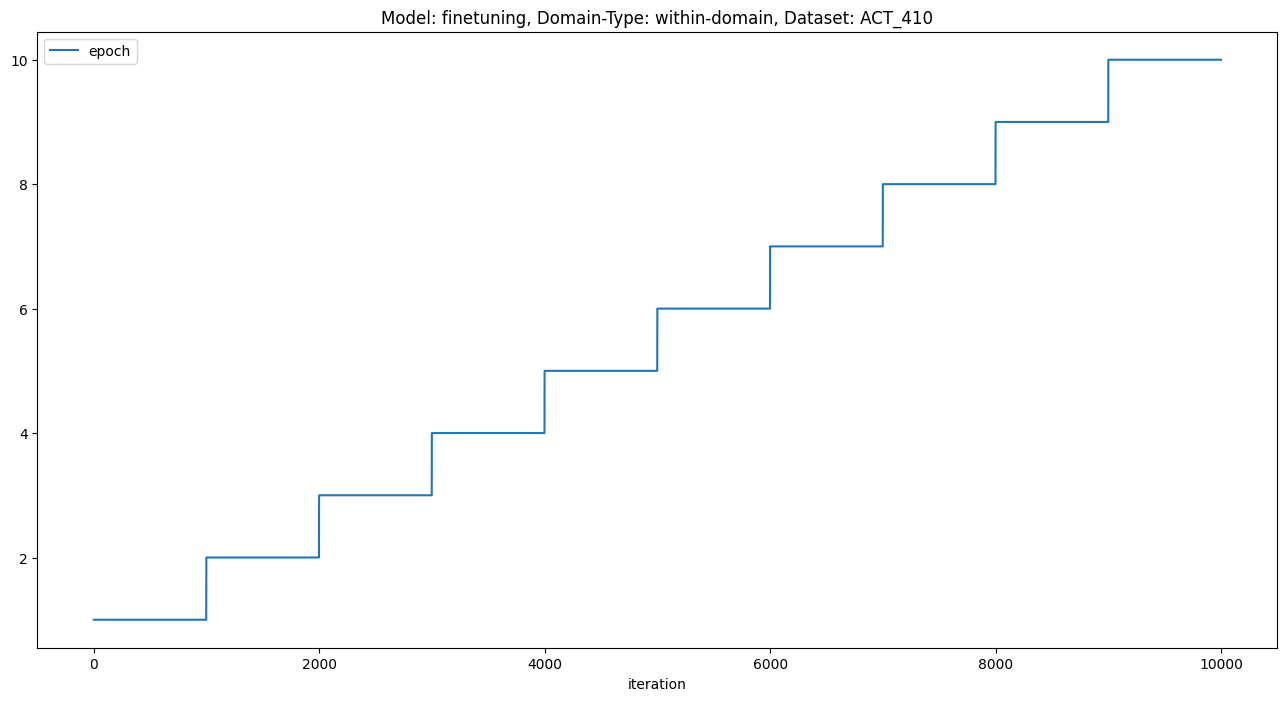

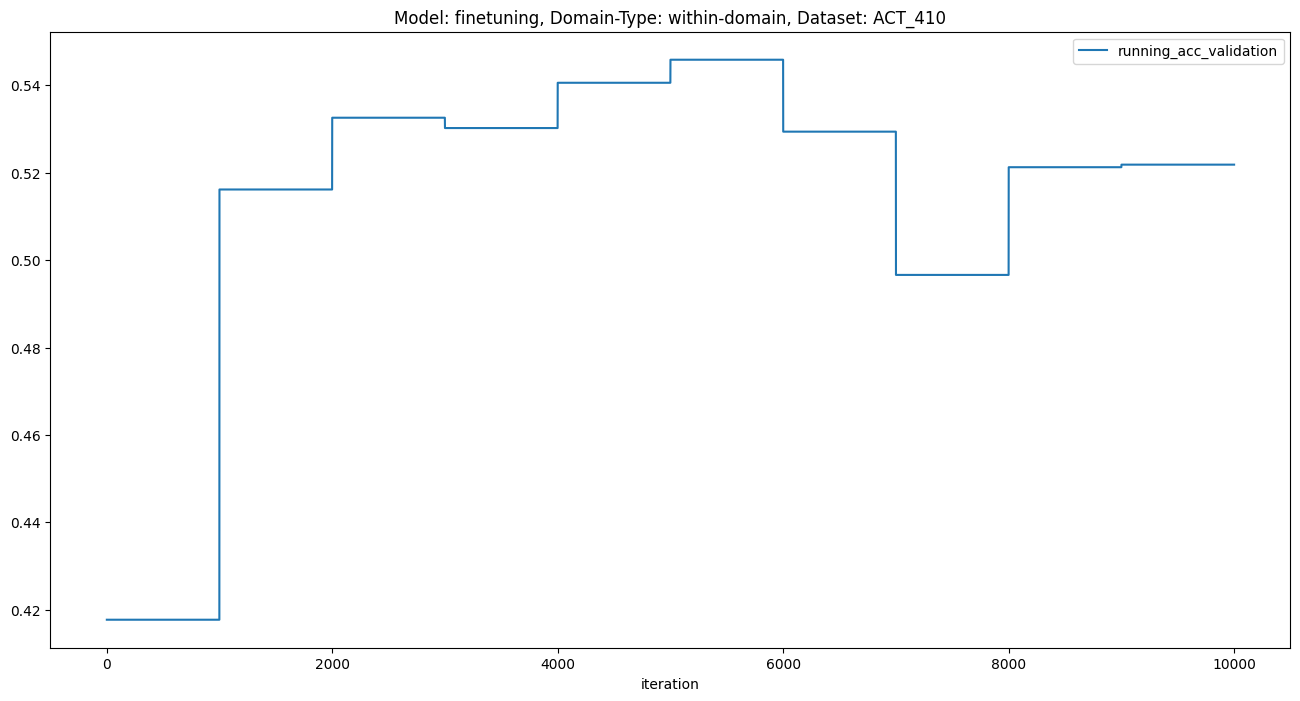

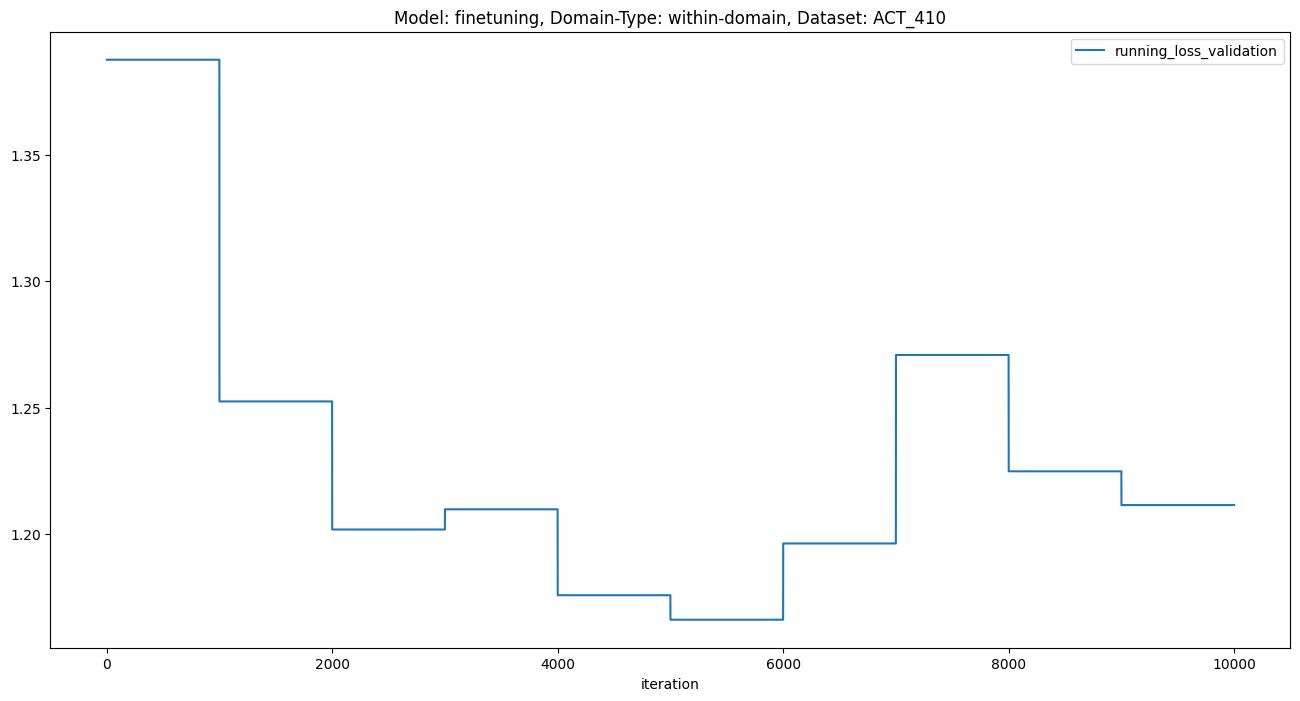

In [7]:
for type in ["loss", "acc"] + list(epochs_df.columns): 
    epochs_df[[col for col in epochs_df.columns if type in col]].plot(figsize=(16, 8), title=info_str)